# Imports

In [1]:
# imports
import sys
sys.path.append('..')
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
import os
# Change to the directory where the train folder is located
os.chdir('../writeup_vectors')
# Verify the change
print("New Working Directory:", os.getcwd())

New Working Directory: /Users/gf244AA/Desktop/Code/fpm-paper/writeup_vectors


In [3]:
# import matplotlib
import matplotlib.pyplot as plt

# format sizes
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 15

# matplotlib params
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rcParams['xtick.direction'] = 'out' # ticks points outwards
plt.rcParams['lines.linewidth'] = 2.0 # bigger linewidth
plt.rcParams['svg.fonttype'] = 'none' # matplotlib svg text setting

In [4]:
def map_value(x, N_pixels):
    # Input range is [-67, 200]
    input_min = -67
    input_max = 200
    
    # Target range is [0, N_pixels] cropped
    output_min = 4
    output_max = N_pixels-4
    
    # Apply the formula
    mapped_value = ((x - input_min) / (input_max - input_min)) * (output_max - output_min) + output_min
    
    return int(mapped_value)

def vectorize_histogram(img):
    # vars
    img_height, img_width = img.shape
    num_bins = 54
    bin_center_locations = np.arange(-67, 202, 5)
    pix_center_locations = [map_value(x, img_width) for x in bin_center_locations]

    # Initialize an array to store the distribution values (1 extra for the first bin)
    dist = np.zeros(num_bins)

    for i,x_pix in enumerate(pix_center_locations):
        for y in range(img_height):
            if img[img_height - y - 1, x_pix+1] < 55:  # Black pixel threshold
                dist[i] += 1
            else:
                break

    # Remove artifacts by subtracting the minimum value from the distribution
    dist -= np.min(dist)
    dist /= np.sum(dist)

    return dist

def plot_generated_image(dist_vec, title='Experiment Image', y_lim=0.2):
    # fig size
    plt.figure(figsize=(6.4, 6.4/2))
    bin_width = 5
    bin_edges = np.arange(-67, 202, 5)
    plt.bar(bin_edges, dist_vec, width=bin_width, edgecolor='dimgrey', linewidth=0.2, color='black', align='center')
    plt.axvline(x=0, color='red', linestyle='--', label='Shape Start')
    plt.xlabel('pattern width (°)')
    plt.ylabel('saccade percentage (%)')
    plt.title(title)
    plt.legend()

    # Formatting
    ax = plt.gca()
    ax.set_xlim(-67, 200)  # Restrict x-axis to -90 to 90
    ax.set_position([0.1, 0.1, 0.9, 0.8])
    # Remove the top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    # Define ticks from -50 to 200 in steps of 25
    ticks = np.arange(-50, 225, 25)
    ax.set_xticks(ticks)
    # Label only every other tick
    labels = [str(tick) if i % 2 == 0 else '' for i, tick in enumerate(ticks)]
    ax.set_xticklabels(labels)
    # Define y ticks from 0 to y_lim in steps of 0.005
    yticks = np.arange(0, y_lim+0.05, 0.05)  # Include 0.05
    ax.set_yticks(yticks)
    # Label only every other y tick (i.e., every 0.01)
    ylabel = [f'{tick:.1f}' if i % 2 == 0 else '' for i, tick in enumerate(yticks)]
    ax.set_yticklabels(ylabel)
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x * 100:.0f}'))

def get_mode_location(dist_vec):
    bin_centers = np.arange(-67, 202, 5)
    highest_index = np.argmax(dist_vec)
    return bin_centers[highest_index]

# Dist 1A

In [5]:
# Path
image_path = 'exp_dist/distribution_1a.png'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Get the vectorized distribution
dist_vec = vectorize_histogram(image)
get_mode_location(dist_vec)

33

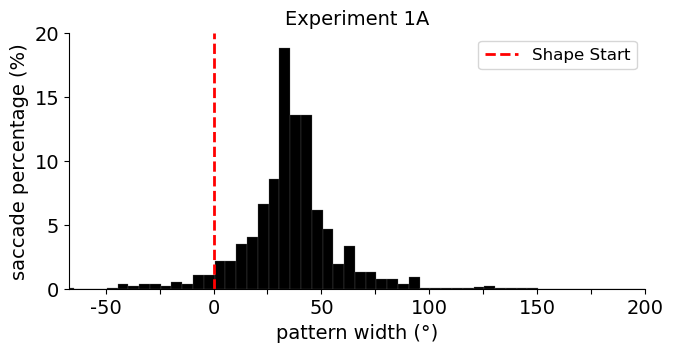

In [6]:
# Plot
plot_generated_image(dist_vec, title='Experiment 1A', y_lim=0.2)

# Save the plot as an SVG file
plt.savefig("vectors/exp_dist_1A.svg", format="svg", bbox_inches='tight')

# Dist 1B

In [7]:
# Path
image_path = 'exp_dist/distribution_1b.png'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Get the vectorized distribution
dist_vec = vectorize_histogram(image)
get_mode_location(dist_vec)

18

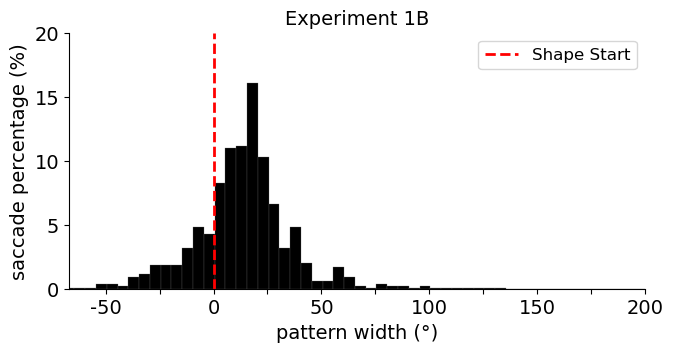

In [8]:
# Plot
plot_generated_image(dist_vec, title='Experiment 1B')

# Save the plot as an SVG file
plt.savefig("vectors/exp_dist_1B.svg", format="svg", bbox_inches='tight')

# Dist 1C

In [9]:
# Path
image_path = 'exp_dist/distribution_1c.png'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Get the vectorized distribution
dist_vec = vectorize_histogram(image)
get_mode_location(dist_vec)

28

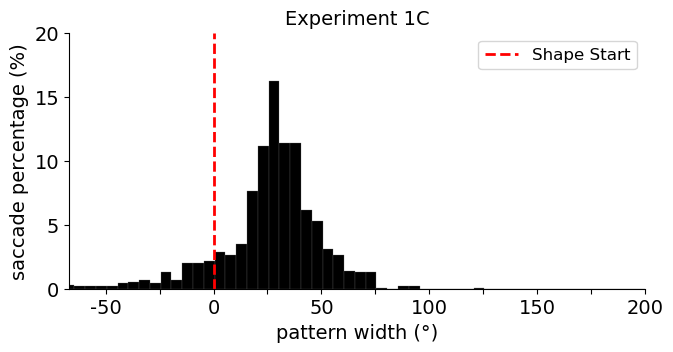

In [10]:
# Plot
plot_generated_image(dist_vec, title='Experiment 1C')

# Save the plot as an SVG file
plt.savefig("vectors/exp_dist_1C.svg", format="svg", bbox_inches='tight')

# Dist 2A/2D

In [11]:
# Path
image_path = 'exp_dist/distribution_2a.png'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Get the vectorized distribution
dist_vec = vectorize_histogram(image)
get_mode_location(dist_vec)

48

In [12]:
# Path
image_path_2 = 'exp_dist/distribution_2d.png'
image_2 = cv2.imread(image_path_2, cv2.IMREAD_GRAYSCALE)

# Get the vectorized distribution
dist_vec_2 = vectorize_histogram(image_2)

In [13]:
y_lim = 0.3
title = 'Distributions 2A/2D'

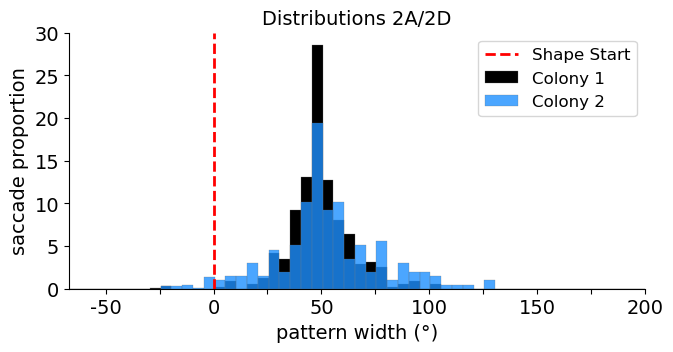

In [14]:
# fig size
plt.figure(figsize=(6.4, 6.4/2))
ax = plt.gca()
bin_width = 5
bin_edges = np.arange(-67, 202, 5)
plt.axvline(x=0, color='red', linestyle='--', label='Shape Start')
plt.bar(bin_edges, dist_vec, width=bin_width, edgecolor='dimgrey', linewidth=0.2, color='black', align='center', label='Colony 1')
plt.bar(bin_edges, dist_vec_2, width=bin_width, edgecolor='dimgrey', linewidth=0.2, color='dodgerblue', align='center', label='Colony 2', alpha=0.8)
plt.xlabel('pattern width (°)')
plt.ylabel('saccade proportion')
plt.title(title)
# Formatting

ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.1f}'))
ax.set_xlim(-67, 200)  # Restrict x-axis to -90 to 90
ax.set_position([0.1, 0.1, 0.9, 0.8])
# Remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# Define ticks from -50 to 200 in steps of 25
ticks = np.arange(-50, 225, 25)
ax.set_xticks(ticks)
# Label only every other tick
labels = [str(tick) if i % 2 == 0 else '' for i, tick in enumerate(ticks)]
ax.set_xticklabels(labels)
# Define y ticks from 0 to y_lim in steps of 0.005
yticks = np.arange(0, y_lim+0.05, 0.05)  # Include 0.05
ax.set_yticks(yticks)
# Label only every other y tick (i.e., every 0.01)
ylabel = [f'{tick:.1f}' if i % 2 == 0 else '' for i, tick in enumerate(yticks)]
ax.set_yticklabels(ylabel)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x * 100:.0f}'))
plt.legend()

# Save the plot as an SVG file
plt.savefig("vectors/exp_dist_2AD.svg", format="svg", bbox_inches='tight')

# Dist 2B/2E

In [15]:
# Path
image_path = 'exp_dist/distribution_2b.png'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Get the vectorized distribution
dist_vec = vectorize_histogram(image)
get_mode_location(dist_vec)

68

In [16]:
# Path
image_path_2 = 'exp_dist/distribution_2e.png'
image_2 = cv2.imread(image_path_2, cv2.IMREAD_GRAYSCALE)

# Get the vectorized distribution
dist_vec_2 = vectorize_histogram(image_2)

In [17]:
y_lim = 0.2
title = 'Distributions 2B/2E'

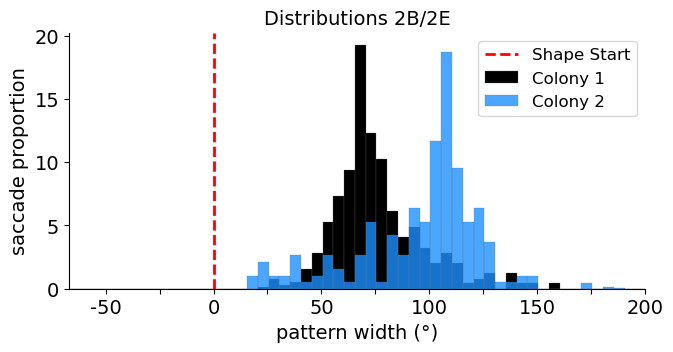

In [18]:
# fig size
plt.figure(figsize=(6.4, 6.4/2))
ax = plt.gca()
bin_width = 5
bin_edges = np.arange(-67, 202, 5)
plt.axvline(x=0, color='red', linestyle='--', label='Shape Start')
plt.bar(bin_edges, dist_vec, width=bin_width, edgecolor='dimgrey', linewidth=0.2, color='black', align='center', label='Colony 1')
plt.bar(bin_edges, dist_vec_2, width=bin_width, edgecolor='dimgrey', linewidth=0.2, color='dodgerblue', align='center', label='Colony 2', alpha=0.8)
plt.xlabel('pattern width (°)')
plt.ylabel('saccade proportion')
plt.title(title)
# Formatting

ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.1f}'))
ax.set_xlim(-67, 200)  # Restrict x-axis to -90 to 90
ax.set_position([0.1, 0.1, 0.9, 0.8])
# Remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# Define ticks from -50 to 200 in steps of 25
ticks = np.arange(-50, 225, 25)
ax.set_xticks(ticks)
# Label only every other tick
labels = [str(tick) if i % 2 == 0 else '' for i, tick in enumerate(ticks)]
ax.set_xticklabels(labels)
# Define y ticks from 0 to y_lim in steps of 0.005
yticks = np.arange(0, y_lim+0.05, 0.05)  # Include 0.05
ax.set_yticks(yticks)
# Label only every other y tick (i.e., every 0.01)
ylabel = [f'{tick:.1f}' if i % 2 == 0 else '' for i, tick in enumerate(yticks)]
ax.set_yticklabels(ylabel)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x * 100:.0f}'))
plt.legend()

# Save the plot as an SVG file
plt.savefig("vectors/exp_dist_2BE.svg", format="svg", bbox_inches='tight')

# Dist 2C

In [19]:
# Path
image_path = 'exp_dist/distribution_2c.png'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Get the vectorized distribution
dist_vec = vectorize_histogram(image)
get_mode_location(dist_vec)

73

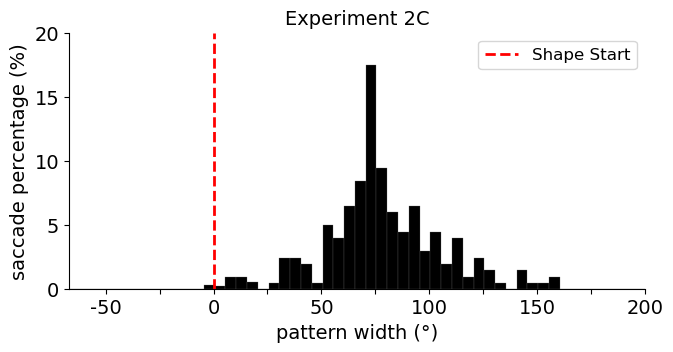

In [20]:
# Plot
plot_generated_image(dist_vec, title='Experiment 2C', y_lim=0.2)

# Save the plot as an SVG file
plt.savefig("vectors/exp_dist_2C.svg", format="svg", bbox_inches='tight')

# Dist 3A1

In [21]:
# Path
image_path = 'exp_dist/distribution_3a1.png'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Get the vectorized distribution
dist_vec = vectorize_histogram(image)
get_mode_location(dist_vec)

23

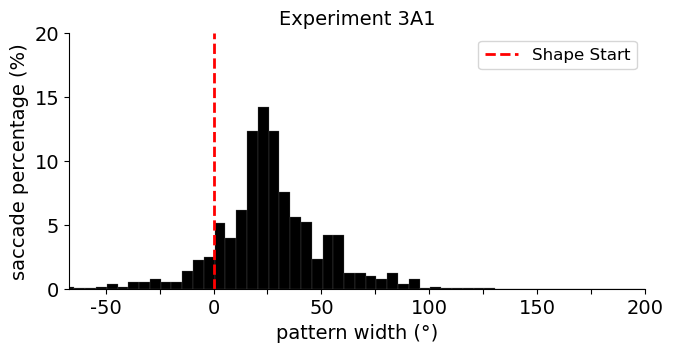

In [22]:
# Plot
plot_generated_image(dist_vec, title='Experiment 3A1')

# Save the plot as an SVG file
plt.savefig("vectors/exp_dist_3A1.svg", format="svg", bbox_inches='tight')

# Dist 3A2

In [23]:
# Path
image_path = 'exp_dist/distribution_3a2.png'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Get the vectorized distribution
dist_vec = vectorize_histogram(image)
get_mode_location(dist_vec)

33

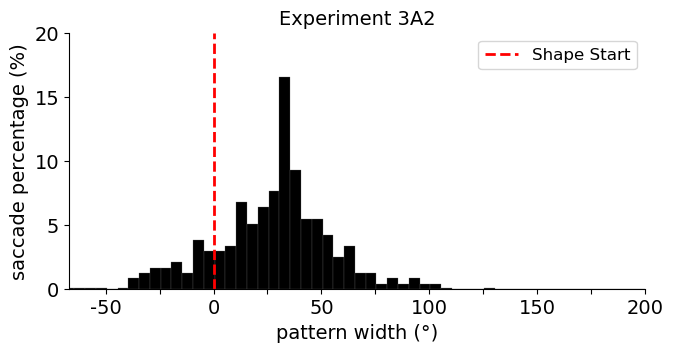

In [24]:
# Plot
plot_generated_image(dist_vec, title='Experiment 3A2')

# Save the plot as an SVG file
plt.savefig("vectors/exp_dist_3A2.svg", format="svg", bbox_inches='tight')

# Dist 3A3

In [25]:
# Path
image_path = 'exp_dist/distribution_3a3.png'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Get the vectorized distribution
dist_vec = vectorize_histogram(image)
get_mode_location(dist_vec)

23

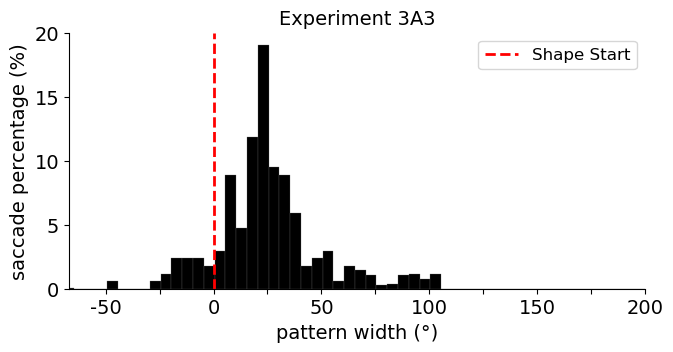

In [26]:
# Plot
plot_generated_image(dist_vec, title='Experiment 3A3')

# Save the plot as an SVG file
plt.savefig("vectors/exp_dist_3A3.svg", format="svg", bbox_inches='tight')

# Dist 3B1

In [27]:
# Path
image_path = 'exp_dist/distribution_3b1.png'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Get the vectorized distribution
dist_vec = vectorize_histogram(image)
get_mode_location(dist_vec)

33

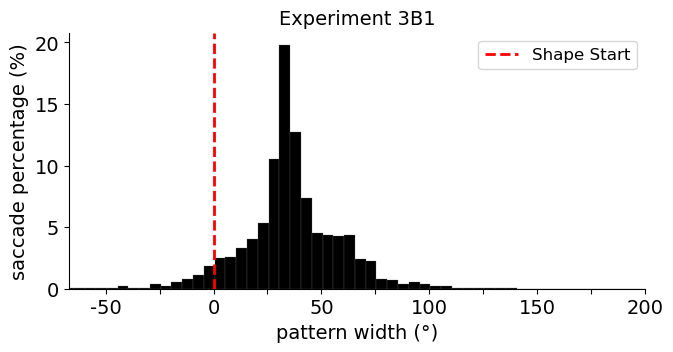

In [28]:
# Plot
plot_generated_image(dist_vec, title='Experiment 3B1')

# Save the plot as an SVG file
plt.savefig("vectors/exp_dist_3B1.svg", format="svg", bbox_inches='tight')

# Dist 3B2

In [29]:
# Path
image_path = 'exp_dist/distribution_3b2.png'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Get the vectorized distribution
dist_vec = vectorize_histogram(image)
get_mode_location(dist_vec)

73

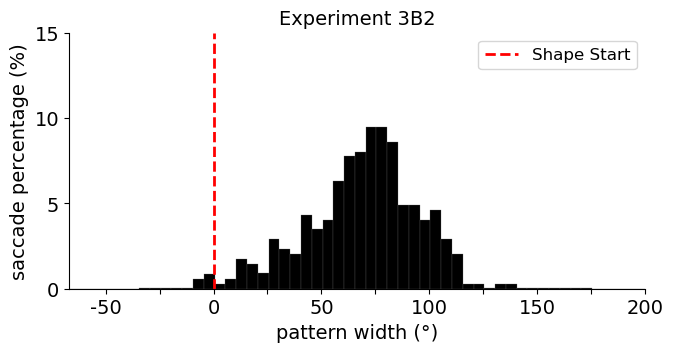

In [30]:
# Plot
plot_generated_image(dist_vec, title='Experiment 3B2', y_lim=0.15)

# Save the plot as an SVG file
plt.savefig("vectors/exp_dist_3B2.svg", format="svg", bbox_inches='tight')

# Dist 3B3

In [31]:
# Path
image_path = 'exp_dist/distribution_3b3.png'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Get the vectorized distribution
dist_vec = vectorize_histogram(image)
get_mode_location(dist_vec)

33

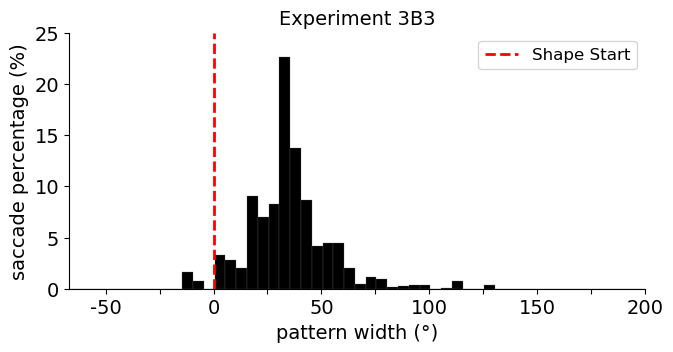

In [32]:
# Plot
plot_generated_image(dist_vec, title='Experiment 3B3', y_lim=0.25)

# Save the plot as an SVG file
plt.savefig("vectors/exp_dist_3B3.svg", format="svg", bbox_inches='tight')

# Dist 3C1

In [33]:
# Path
image_path = 'exp_dist/distribution_3c1.png'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Get the vectorized distribution
dist_vec = vectorize_histogram(image)
get_mode_location(dist_vec)

53

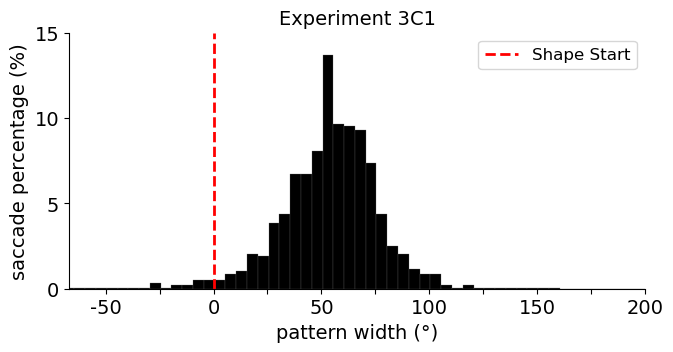

In [34]:
# Plot
plot_generated_image(dist_vec, title='Experiment 3C1', y_lim=0.15)

# Save the plot as an SVG file
plt.savefig("vectors/exp_dist_3C1.svg", format="svg", bbox_inches='tight')

# Dist 3C2

In [35]:
# Path
image_path = 'exp_dist/distribution_3c2.png'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Get the vectorized distribution
dist_vec = vectorize_histogram(image)
get_mode_location(dist_vec)

63

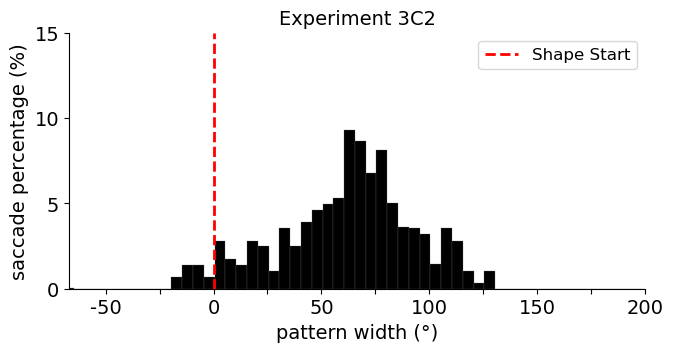

In [36]:
# Plot
plot_generated_image(dist_vec, title='Experiment 3C2', y_lim=0.15)

# Save the plot as an SVG file
plt.savefig("vectors/exp_dist_3C2.svg", format="svg", bbox_inches='tight')

# Dist 3C3

In [37]:
# Path
image_path = 'exp_dist/distribution_3c3.png'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Get the vectorized distribution
dist_vec = vectorize_histogram(image)
get_mode_location(dist_vec)

43

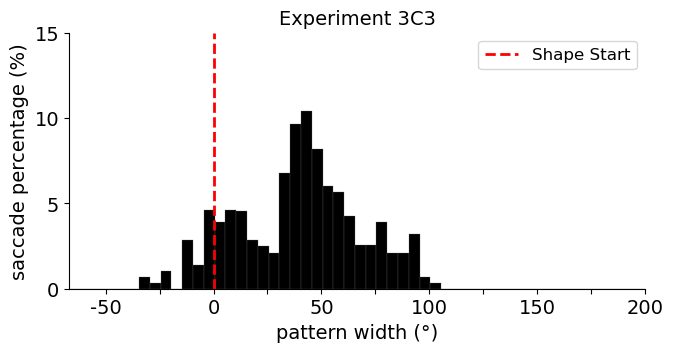

In [38]:
# Plot
plot_generated_image(dist_vec, title='Experiment 3C3', y_lim=0.15)

# Save the plot as an SVG file
plt.savefig("vectors/exp_dist_3C3.svg", format="svg", bbox_inches='tight')